## Movie_Studio_P1_Project_HK

* Student name: Hera K.
* Student pace: full time
* Scheduled project review date/time: 03/10/2023
* Instructor name: Daniel Burdeno
* Blog post URL:


##  Overview

This project analyzes the most popular, top movies which will be preffered to make a film in a new studio business of Microsoft. Descriptive analysis of movies shows that the relationship among release date, worldwide gross and ratings in imbd records. Microsoft can use this analysis to adjust new movie category, when it should be launched to improve their new studio business.


## Business Problem

Microsoft may be able to improve their resource allocation to get more turnover in the correct season with three categories of movies. Preferring these movies aims more satisfied audience thanks to the high demanded movies while company is going to get anticipated turnover.

## Data Understanding

Miscrosoft has the most huge public dataset of movies, ratings, years, release years and more. Every movie category has a unique ID associated with both their names, dates, rating, budget data. The data files provide the dates and types of each movie, as well as other movies characteristics (e.g. type, release date, ratings etc).


In [73]:

import pandas as pd
import sqlite3


In [74]:
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [75]:
tn_movie.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [76]:
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [78]:
tn_movie.shape

(5782, 6)

In [79]:
tn_movie['movie'].sort_index(ascending=True)

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [80]:
tn_movie['worldwide_gross'].sort_index(ascending=True)

0       $2,776,345,279
1       $1,045,663,875
2         $149,762,350
3       $1,403,013,963
4       $1,316,721,747
             ...      
5777                $0
5778          $240,495
5779            $1,338
5780                $0
5781          $181,041
Name: worldwide_gross, Length: 5782, dtype: object

In [81]:
tmdb_movie = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [82]:
conn = sqlite3.connect('zippedData/im.db') 

In [83]:
movie_ratings = pd.read_sql("""

SELECT *
FROM movie_ratings



""", conn)
movie_ratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [84]:
movie_ratings.shape

(73856, 3)

In [85]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [86]:
movie_basics = pd.read_sql("""

SELECT *
FROM movie_basics


""", conn)
movie_basics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [87]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


# Merging Dataset (movie_basics & movie_ratings)

In [88]:
# Merge movie_basics and movie_ratings on movie_id

movie_bas_rat = pd.merge(movie_basics, 
                        movie_ratings, 
                        on=['movie_id'], 
                        how='inner')


In [89]:
movie_bas_rat

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [90]:
movie_bas_rat.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [91]:
movie_bas_rat['primary_title'].nunique()

69993

In [92]:
movie_bas_rat['original_title'].nunique()

71097

In [93]:
movie_bas_rat.shape

(73856, 8)

In [94]:
movie_bas_rat['movie_id'].nunique()

73856

In [95]:
tn_movie['movie'].nunique()

5698

In [96]:
tn_movie.shape

(5782, 6)

# Eliminated duplicate columns 

In [97]:
# eliminated duplicate columns

movie_bas_rat.drop_duplicates(['primary_title'], inplace=True)

In [98]:
movie_bas_rat.shape 

(69993, 8)

In [99]:
# eliminated duplicate columns

tn_movie.drop_duplicates(['movie'], inplace=True)

In [100]:
tn_movie.shape

(5698, 6)

# Merging Dataset ( movie_bas_rat & tn_movie)

In [101]:
# Merged movie_bas_rat and tn_movie on primary_title & movie

mov_bas_rat2 = pd.merge(movie_bas_rat, 
                        tn_movie, 
                        left_on=['primary_title'], 
                        right_on= ['movie'],
                        how='inner')

In [102]:
mov_bas_rat2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,tt8680254,Richard III,Richard III,2016,NaN,Drama,9.1,28,65,"Dec 29, 1995",Richard III,"$9,200,000","$2,684,904","$4,199,334"
2122,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","$655,538"
2123,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527","$49,678,401"
2124,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",6.3,5945,33,"Mar 29, 2019",Unplanned,"$6,000,000","$18,107,621","$18,107,621"


In [103]:
mov_bas_rat2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"


In [104]:
mov_bas_rat2.shape

(2126, 14)

In [105]:
mov_bas_rat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2126 non-null   object 
 1   primary_title      2126 non-null   object 
 2   original_title     2126 non-null   object 
 3   start_year         2126 non-null   int64  
 4   runtime_minutes    2072 non-null   float64
 5   genres             2124 non-null   object 
 6   averagerating      2126 non-null   float64
 7   numvotes           2126 non-null   int64  
 8   id                 2126 non-null   int64  
 9   release_date       2126 non-null   object 
 10  movie              2126 non-null   object 
 11  production_budget  2126 non-null   object 
 12  domestic_gross     2126 non-null   object 
 13  worldwide_gross    2126 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 249.1+ KB


# Removed null ( missing data ) 

In [106]:
# Removed null data
mov_bas_rat2 = mov_bas_rat2.dropna(subset=['runtime_minutes','genres']) 

In [107]:
mov_bas_rat2['genres']

0       Action,Animation,Comedy
2       Adventure,Drama,Romance
3        Adventure,Comedy,Drama
4            Action,Crime,Drama
5       Action,Adventure,Sci-Fi
                 ...           
2118                      Drama
2120                      Drama
2122                Documentary
2123                Documentary
2124            Biography,Drama
Name: genres, Length: 2070, dtype: object

In [108]:
mov_bas_rat2.groupby('genres')

In [109]:
# groupby objects are intended to be used with aggregation

mov_bas_rat2.groupby('genres').count()

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
genres,,,,,,,,,,,,,
Action,8,8,8,8,8,8,8,8,8,8,8,8,8
"Action,Adventure",2,2,2,2,2,2,2,2,2,2,2,2,2
"Action,Adventure,Animation",17,17,17,17,17,17,17,17,17,17,17,17,17
"Action,Adventure,Biography",4,4,4,4,4,4,4,4,4,4,4,4,4
"Action,Adventure,Comedy",28,28,28,28,28,28,28,28,28,28,28,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi,3,3,3,3,3,3,3,3,3,3,3,3,3
"Sci-Fi,Thriller",4,4,4,4,4,4,4,4,4,4,4,4,4
Thriller,17,17,17,17,17,17,17,17,17,17,17,17,17


In [110]:
mov_bas_rat2['genres'].value_counts()

Drama                         146
Comedy                         75
Comedy,Drama                   71
Adventure,Animation,Comedy     68
Comedy,Drama,Romance           66
                             ... 
Comedy,Drama,Horror             1
Documentary,Drama,Family        1
Horror,Musical                  1
Drama,Music,Thriller            1
Documentary,Sport,Thriller      1
Name: genres, Length: 283, dtype: int64

# Replace character from string - in worlwide_gross column

In [111]:
# replace $ character from string in pandas
# comma should be removed

mov_bas_rat2['worldwide_gross'] = mov_bas_rat2['worldwide_gross'].str.replace('$', '')

mov_bas_rat2

<ipython-input-111-30e9964e2f77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_bas_rat2['worldwide_gross'] = mov_bas_rat2['worldwide_gross'].str.replace('$', '')


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"73,706"
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","9,313,302"
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","187,861,183"
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","62,108,587"
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","1,648,854,864"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,tt8653840,Flawless,Haneshef,2018,97.0,Drama,6.4,34,14,"Nov 24, 1999",Flawless,"$27,000,000","$4,485,485","4,485,485"
2120,tt8662424,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,"Jul 12, 2002",Never Again,"$500,000","$307,631","308,793"
2122,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538","655,538"
2123,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527","49,678,401"


In [112]:
# comma should be removed

mov_bas_rat2['worldwide_gross'] = mov_bas_rat2['worldwide_gross'].str.replace(',', '')

mov_bas_rat2

<ipython-input-112-b6b03974093b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_bas_rat2['worldwide_gross'] = mov_bas_rat2['worldwide_gross'].str.replace(',', '')


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,73706
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828",9313302
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838",187861183
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685",62108587
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,tt8653840,Flawless,Haneshef,2018,97.0,Drama,6.4,34,14,"Nov 24, 1999",Flawless,"$27,000,000","$4,485,485",4485485
2120,tt8662424,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,"Jul 12, 2002",Never Again,"$500,000","$307,631",308793
2122,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538",655538
2123,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527",49678401


In [113]:
mov_bas_rat2.dtypes

movie_id              object
primary_title         object
original_title        object
start_year             int64
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
dtype: object

# Turning string into float worldwide_gross column

In [114]:
# Turn string into float 

mov_bas_rat2['worldwide_gross'] = mov_bas_rat2['worldwide_gross'].astype(float)

print(mov_bas_rat2.dtypes)

movie_id              object
primary_title         object
original_title        object
start_year             int64
runtime_minutes      float64
genres                object
averagerating        float64
numvotes               int64
id                     int64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross      float64
dtype: object


<ipython-input-114-d7ef56b3769e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_bas_rat2['worldwide_gross'] = mov_bas_rat2['worldwide_gross'].astype(float)


In [115]:
mov_bas_rat2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,7.370600e+04
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828",9.313302e+06
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838",1.878612e+08
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685",6.210859e+07
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1.648855e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,tt8653840,Flawless,Haneshef,2018,97.0,Drama,6.4,34,14,"Nov 24, 1999",Flawless,"$27,000,000","$4,485,485",4.485485e+06
2120,tt8662424,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,"Jul 12, 2002",Never Again,"$500,000","$307,631",3.087930e+05
2122,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538",6.555380e+05
2123,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527",4.967840e+07


## Representing and manipulating date/ time

In [116]:
# retrieve the column
# It provides a variety of classes for representing and manipulating dates and times, 
# as well as for formatting and parsing dates and times in a variety of formats.

date_time = pd.to_datetime(mov_bas_rat2['release_date'])
date_time


0      2012-12-31
2      2013-03-22
3      2013-12-25
4      2014-09-19
5      2015-06-12
          ...    
2118   1999-11-24
2120   2002-07-12
2122   2008-10-24
2123   2009-02-06
2124   2019-03-29
Name: release_date, Length: 2070, dtype: datetime64[ns]

In [117]:
# Months 

date_time.dt.month

0       12
2        3
3       12
4        9
5        6
        ..
2118    11
2120     7
2122    10
2123     2
2124     3
Name: release_date, Length: 2070, dtype: int64

In [118]:
# added column for 'months'
mov_bas_rat2['months'] = date_time.dt.month
mov_bas_rat2

<ipython-input-118-06a5898e36ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_bas_rat2['months'] = date_time.dt.month


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,months
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,7.370600e+04,12
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828",9.313302e+06,3
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838",1.878612e+08,12
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685",6.210859e+07,9
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1.648855e+09,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,tt8653840,Flawless,Haneshef,2018,97.0,Drama,6.4,34,14,"Nov 24, 1999",Flawless,"$27,000,000","$4,485,485",4.485485e+06,11
2120,tt8662424,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,"Jul 12, 2002",Never Again,"$500,000","$307,631",3.087930e+05,7
2122,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538",6.555380e+05,10
2123,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527",4.967840e+07,2


In [119]:
mov_month = mov_bas_rat2.groupby(by=['months']).agg('mean')
mov_month

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross
months,,,,,,
1,2013.576923,102.376923,6.000000,49499.538462,52.300000,6.564779e+07
2,2013.911565,102.517007,6.163265,78102.380952,53.585034,1.022302e+08
3,2013.805714,102.588571,6.163429,82562.457143,50.720000,1.179195e+08
4,2013.293103,103.597701,6.212069,60326.402299,49.936782,9.606857e+07
5,2013.478261,105.333333,6.271014,125446.811594,47.811594,1.881128e+08
6,2013.730061,103.920245,6.308589,100988.055215,50.226994,1.943681e+08
7,2013.484663,104.840491,6.277914,107865.840491,50.392638,1.563193e+08
8,2013.392045,99.840909,6.109091,67213.255682,54.323864,7.373001e+07
9,2013.402235,102.206704,6.284916,71082.815642,48.201117,5.990639e+07


# Hihgest Worlwide Gross (top_month) associated with the Top Months 

In [120]:

top_month = mov_month.sort_values(by = 'worldwide_gross', ascending=False)
top_month

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross
months,,,,,,
6,2013.730061,103.920245,6.308589,100988.055215,50.226994,1.943681e+08
5,2013.478261,105.333333,6.271014,125446.811594,47.811594,1.881128e+08
11,2013.706897,108.816092,6.613218,120299.431034,47.551724,1.582411e+08
7,2013.484663,104.840491,6.277914,107865.840491,50.392638,1.563193e+08
3,2013.805714,102.588571,6.163429,82562.457143,50.720000,1.179195e+08
12,2013.485944,105.742972,6.080321,74800.694779,51.349398,1.129617e+08
2,2013.911565,102.517007,6.163265,78102.380952,53.585034,1.022302e+08
4,2013.293103,103.597701,6.212069,60326.402299,49.936782,9.606857e+07
8,2013.392045,99.840909,6.109091,67213.255682,54.323864,7.373001e+07


In [121]:
mov_bas_rat2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,months
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,7.370600e+04,12
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828",9.313302e+06,3
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838",1.878612e+08,12
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685",6.210859e+07,9
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1.648855e+09,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,tt8653840,Flawless,Haneshef,2018,97.0,Drama,6.4,34,14,"Nov 24, 1999",Flawless,"$27,000,000","$4,485,485",4.485485e+06,11
2120,tt8662424,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,"Jul 12, 2002",Never Again,"$500,000","$307,631",3.087930e+05,7
2122,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538",6.555380e+05,10
2123,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527",4.967840e+07,2


In [122]:
mov_gen = mov_bas_rat2.groupby(by=['genres']).agg('mean')
mov_gen

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross,months
genres,,,,,,,
Action,2012.625000,92.125000,6.062500,7368.500000,42.875000,8.755225e+07,8.625000
"Action,Adventure",2012.000000,110.000000,6.350000,6972.500000,41.000000,5.683002e+06,10.000000
"Action,Adventure,Animation",2014.058824,100.294118,7.429412,180186.764706,45.941176,4.374047e+08,5.941176
"Action,Adventure,Biography",2015.000000,137.500000,7.250000,229733.000000,9.500000,2.206284e+08,11.250000
"Action,Adventure,Comedy",2014.857143,109.250000,6.392857,211068.678571,50.178571,3.291231e+08,6.321429
...,...,...,...,...,...,...,...
Sci-Fi,2014.000000,64.000000,4.066667,204.666667,29.000000,2.412033e+08,5.000000
"Sci-Fi,Thriller",2014.500000,89.500000,4.900000,7779.750000,58.500000,2.822872e+07,5.000000
Thriller,2012.882353,89.941176,5.500000,330.058824,58.176471,4.195074e+07,6.470588


# Most Popular Genres based on Averagerating

In [123]:

pop_genre = mov_gen.sort_values(by = 'averagerating', ascending=False)
pop_genre.head(10)

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross,months
genres,,,,,,,
"Action,Documentary,Drama",2014.000000,60.000000,8.700000,22.000000,51.000000,6.245293e+07,2.000000
"Drama,Mystery,War",2010.000000,131.000000,8.300000,124156.000000,76.000000,1.603834e+07,9.000000
"Adventure,Drama,Sci-Fi",2014.500000,156.500000,8.300000,989725.000000,39.000000,6.608254e+08,10.500000
"Crime,Documentary",2011.000000,113.000000,8.250000,48209.500000,41.500000,4.513286e+06,8.500000
"Documentary,Drama,History",2013.000000,108.000000,8.100000,7998.000000,10.000000,7.409320e+05,4.000000
"Documentary,Sport,Thriller",2017.000000,120.000000,7.900000,28979.000000,91.000000,0.000000e+00,2.000000
"Adventure,Biography,Documentary",2014.333333,83.666667,7.833333,1020.333333,64.333333,8.301637e+07,9.333333
"Documentary,Sport",2012.500000,96.500000,7.800000,1668.500000,39.500000,2.385245e+05,7.000000
"Biography,Documentary,Drama",2013.250000,67.000000,7.725000,74.250000,46.000000,8.422867e+07,5.250000


In [124]:
pop_genre_10 = pop_genre.head(10)
pop_genre_10

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross,months
genres,,,,,,,
"Action,Documentary,Drama",2014.000000,60.000000,8.700000,22.000000,51.000000,6.245293e+07,2.000000
"Drama,Mystery,War",2010.000000,131.000000,8.300000,124156.000000,76.000000,1.603834e+07,9.000000
"Adventure,Drama,Sci-Fi",2014.500000,156.500000,8.300000,989725.000000,39.000000,6.608254e+08,10.500000
"Crime,Documentary",2011.000000,113.000000,8.250000,48209.500000,41.500000,4.513286e+06,8.500000
"Documentary,Drama,History",2013.000000,108.000000,8.100000,7998.000000,10.000000,7.409320e+05,4.000000
"Documentary,Sport,Thriller",2017.000000,120.000000,7.900000,28979.000000,91.000000,0.000000e+00,2.000000
"Adventure,Biography,Documentary",2014.333333,83.666667,7.833333,1020.333333,64.333333,8.301637e+07,9.333333
"Documentary,Sport",2012.500000,96.500000,7.800000,1668.500000,39.500000,2.385245e+05,7.000000
"Biography,Documentary,Drama",2013.250000,67.000000,7.725000,74.250000,46.000000,8.422867e+07,5.250000


# Top Genres based on Worldwide Gross

In [125]:
# Top genres based on worldwide_gross

top_genre = mov_gen.sort_values(by = 'worldwide_gross', ascending=False)
top_genre

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross,months
genres,,,,,,,
"Adventure,Drama,Sport",2010.000000,93.000000,6.200000,62311.000000,56.000000,1.272470e+09,11.000000
"Adventure,Fantasy",2013.333333,139.666667,7.166667,375770.333333,36.333333,7.012107e+08,9.000000
"Adventure,Drama,Sci-Fi",2014.500000,156.500000,8.300000,989725.000000,39.000000,6.608254e+08,10.500000
"Action,Adventure,Sci-Fi",2014.581818,127.581818,6.660000,393743.963636,48.927273,6.235437e+08,6.072727
"Comedy,Mystery",2011.000000,102.000000,6.500000,432800.000000,39.000000,5.864643e+08,5.000000
...,...,...,...,...,...,...,...
"Animation,Family",2014.000000,67.000000,6.200000,132.000000,91.000000,0.000000e+00,8.000000
"Action,Drama,Sport",2015.000000,98.000000,6.700000,81.000000,50.000000,0.000000e+00,9.000000
"Action,Crime,Fantasy",2017.000000,117.000000,6.400000,147834.000000,80.000000,0.000000e+00,12.000000


In [126]:
mov_bas_rat2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,months
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,7.370600e+04,12
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828",9.313302e+06,3
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838",1.878612e+08,12
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685",6.210859e+07,9
5,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1.648855e+09,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,tt8653840,Flawless,Haneshef,2018,97.0,Drama,6.4,34,14,"Nov 24, 1999",Flawless,"$27,000,000","$4,485,485",4.485485e+06,11
2120,tt8662424,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,"Jul 12, 2002",Never Again,"$500,000","$307,631",3.087930e+05,7
2122,tt8824064,Heroes,Heroes,2019,88.0,Documentary,7.3,7,12,"Oct 24, 2008",Heroes,"$400,000","$655,538",6.555380e+05,10
2123,tt8976772,Push,Push,2019,92.0,Documentary,7.3,33,70,"Feb 6, 2009",Push,"$38,000,000","$31,811,527",4.967840e+07,2


## Analysis

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris

In [128]:
pop_genre_10

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross,months
genres,,,,,,,
"Action,Documentary,Drama",2014.000000,60.000000,8.700000,22.000000,51.000000,6.245293e+07,2.000000
"Drama,Mystery,War",2010.000000,131.000000,8.300000,124156.000000,76.000000,1.603834e+07,9.000000
"Adventure,Drama,Sci-Fi",2014.500000,156.500000,8.300000,989725.000000,39.000000,6.608254e+08,10.500000
"Crime,Documentary",2011.000000,113.000000,8.250000,48209.500000,41.500000,4.513286e+06,8.500000
"Documentary,Drama,History",2013.000000,108.000000,8.100000,7998.000000,10.000000,7.409320e+05,4.000000
"Documentary,Sport,Thriller",2017.000000,120.000000,7.900000,28979.000000,91.000000,0.000000e+00,2.000000
"Adventure,Biography,Documentary",2014.333333,83.666667,7.833333,1020.333333,64.333333,8.301637e+07,9.333333
"Documentary,Sport",2012.500000,96.500000,7.800000,1668.500000,39.500000,2.385245e+05,7.000000
"Biography,Documentary,Drama",2013.250000,67.000000,7.725000,74.250000,46.000000,8.422867e+07,5.250000


# Popular 10 Genres based on Averagerating

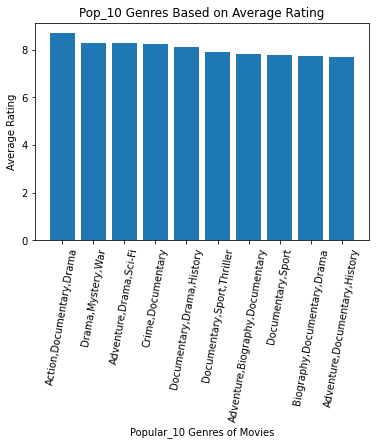

In [129]:


fig, ax = plt.subplots()
ax.bar(x= pop_genre_10.index, height= pop_genre_10['averagerating'])
plt.title('Pop_10 Genres Based on Average Rating')
ax.set_xlabel('Popular_10 Genres of Movies')
ax.set_ylabel('Average Rating')


plt.savefig("pop_10.png", transparent = True, dpi=150)

plt.xticks(rotation=80);
plt.show()

# Explanation # Pop_10_Genres Graph

Pop_10 genre bar graph displays us the most popular ten movies. All ten movie genres have very close average ratings to each other.

In [130]:
top_genre_10 = top_genre.head(10)
top_genre_10

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross,months
genres,,,,,,,
"Adventure,Drama,Sport",2010.000000,93.000000,6.200000,62311.000000,56.000000,1.272470e+09,11.000000
"Adventure,Fantasy",2013.333333,139.666667,7.166667,375770.333333,36.333333,7.012107e+08,9.000000
"Adventure,Drama,Sci-Fi",2014.500000,156.500000,8.300000,989725.000000,39.000000,6.608254e+08,10.500000
"Action,Adventure,Sci-Fi",2014.581818,127.581818,6.660000,393743.963636,48.927273,6.235437e+08,6.072727
"Comedy,Mystery",2011.000000,102.000000,6.500000,432800.000000,39.000000,5.864643e+08,5.000000
"Drama,Family,Fantasy",2015.000000,105.000000,6.900000,142792.000000,13.000000,5.345514e+08,3.000000
"Adventure,Animation,Drama",2013.000000,94.000000,4.800000,11728.000000,100.000000,4.481918e+08,6.000000
"Action,Adventure,Animation",2014.058824,100.294118,7.429412,180186.764706,45.941176,4.374047e+08,5.941176
"Adventure,Mystery,Sci-Fi",2012.000000,124.000000,7.000000,538720.000000,75.000000,4.024483e+08,6.000000


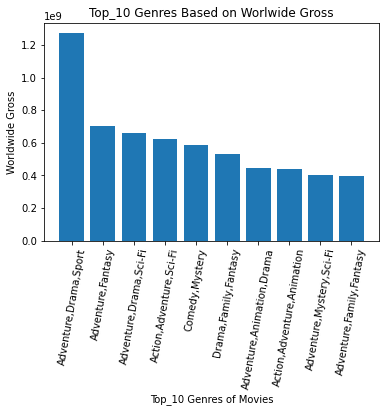

In [131]:
# top_10 genre based on worldwide gross

fig, ax = plt.subplots()
ax.bar(x= top_genre_10.index, height= top_genre_10['worldwide_gross'])
plt.title('Top_10 Genres Based on Worlwide Gross')
ax.set_xlabel('Top_10 Genres of Movies')
ax.set_ylabel('Worldwide Gross')

plt.savefig("top_10.png", dpi=150)
plt.xticks(rotation=80);

# Explanation # Top_10_Genres Graph

Top_10 genre bar graph displays us the most top ten movies based on worldwide gross. 'Adventure,Drama,Sport' is the sharply highest of top ten movie genres compared to other genres. Rest of the genres are close each other as shown graph.

# Hihgest Worlwide Gross (top_month) according to the top month

In [132]:
top_month

,start_year,runtime_minutes,averagerating,numvotes,id,worldwide_gross
months,,,,,,
6,2013.730061,103.920245,6.308589,100988.055215,50.226994,1.943681e+08
5,2013.478261,105.333333,6.271014,125446.811594,47.811594,1.881128e+08
11,2013.706897,108.816092,6.613218,120299.431034,47.551724,1.582411e+08
7,2013.484663,104.840491,6.277914,107865.840491,50.392638,1.563193e+08
3,2013.805714,102.588571,6.163429,82562.457143,50.720000,1.179195e+08
12,2013.485944,105.742972,6.080321,74800.694779,51.349398,1.129617e+08
2,2013.911565,102.517007,6.163265,78102.380952,53.585034,1.022302e+08
4,2013.293103,103.597701,6.212069,60326.402299,49.936782,9.606857e+07
8,2013.392045,99.840909,6.109091,67213.255682,54.323864,7.373001e+07


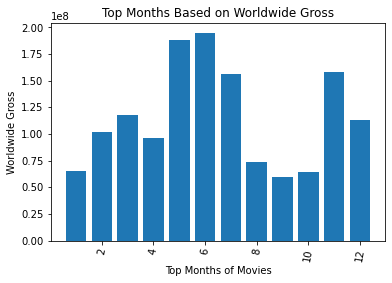

In [133]:
# hihgest worlwide gross (top_month) according to the month 

fig, ax = plt.subplots()
ax.bar(x= top_month.index, height= top_month['worldwide_gross'])
plt.title('Top Months Based on Worldwide Gross')
ax.set_xlabel('Top Months of Movies')
ax.set_ylabel('Worldwide Gross')

plt.savefig("top_month.png", dpi=150)
plt.xticks(rotation=80);


# Explanation # Top_Month Graph
This graph shows that relationship between top months and the highest worlwide gross. We can obviously analyze that the best profitable months according to the highest worldwide gross. As shown on the graph, 5th, 6th, 7th and 11th months are the most lucrative time to release the movies.

## Result

Most popular and top movies are resulted based on ratings, worldwide turnover and for the best season to release them.


## Conclusion

This analysis leads to three recommendations for following procedures of Microsoft new studio:

1. 'Adventure, Documentary, Drama', ‘Drama, Mystery, War’, ‘Adventure, Drama, Sci-Fi’, ‘Crime-Documentary ‘, ‘Documentary, Drama, History’ are the pop 5 genres of movies based on audience's highest ratings as analysis result. Pop 10 movies are displayed into related bar graph.
2.  The highest genre among top 10 genres of movies features as “Adventure,Drama,Sport” based on worldwide turnover. “Adventure-Fantasy”, “Adventure,Drama,Sci-Fi” could be concerned as following options within 50% percentage of Adventure,Drama,Sport”.
3.  Microsoft studio can concern the best profitable months are May, June and July summer season based on the highest worldwide gross. Furthermore November is another option which is close to July potential among the top months to release the movie.


## Next Step

Further analyses could yield additional insights to further improve operations at Microsoft:

1. Priority on this analysis is based on relationship among the Pop_10 genres, Top_10 genres, Ratings, Best Season and Global Turnover. 
2. The related analysis does not include runtime of movies, it is available in different database, not evaluated in above analysis.
3. This analysis is based on the information as below links. They does not include, actor, director, writer information. Based on different sources, it could be observed for another recommendation.


##  For More Information

See the full analysis in the Jupyter Notebook or review this presentation.

For additional info, contact drykvf@gmail.com

Repository Structure


├── data
├── images
├── README.md
├── .pdf
└── .ipynb
